In [1]:
# If gspx is not installed, we add it to the path
import os, sys
gdir = os.path.dirname(os.getcwd())  # parent folder
sys.path.insert(0, gdir)

from pyquaternion import Quaternion
from gspx.utils.graph import make_grid
import matplotlib.pyplot as plt
import numpy as np

# Experiments with 1D-QDFT.

Getting insights as what can be used in the generalization to the QGFT.

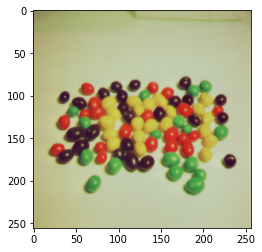

In [2]:
im_path = gdir + "/resources/jelly_beans.tiff"
arr = plt.imread(im_path)
plt.imshow(arr)

In [4]:
def autostack1D(x, orientation='v'):
    assert len(x.shape) == 1
    stacked = np.reshape(x, (-1, 1)) @ (1 + np.zeros((1, x.shape[0])))
    if orientation == 'v':
        stacked = stacked.T
    return stacked

r, c, _ = arr.shape
# x_avg = np.mean(arr, axis=0)
x = arr[int(r/2), :, :]

xq = np.array([Quaternion(scalar=0, vector=row) for row in x])

stacked = autostack1D(xq)

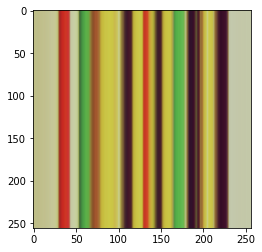

In [6]:
R, C = stacked.shape
rgb = np.zeros((R, C, 3))
for row in range(R):
    for col in range(C):
        a = stacked[row, col]
        rgb[row, col, :] = [a[1], a[2], a[3]]
rgb = np.floor(rgb).astype(int)
plt.imshow(rgb)

In [ ]:
from pyquaternion import Quaternion

axis = [1, 1, 1]

mu = Quaternion(axis=axis, degrees=180)

N = len(x)
QDFT = np.array([[
    Quaternion.exp(- mu * 2 * np.pi * n * k / N)
    for n in range(N)] for k in range(N)
])

In [9]:
QDFT.shape

(256, 256)

In [27]:
from numpy.lib.stride_tricks import sliding_window_view
y = np.arange(30)
window = np.ones(10)
window[5:] = 0

def apply_1d_windowed_transform(x, transform_mtx, window=None):
    if window is None:
        window = np.ones(len(x))
    

slides = sliding_window_view(y, window_shape=10)

print(slides * window)

[[ 0.  1.  2.  3.  4.  0.  0.  0.  0.  0.]
 [ 1.  2.  3.  4.  5.  0.  0.  0.  0.  0.]
 [ 2.  3.  4.  5.  6.  0.  0.  0.  0.  0.]
 [ 3.  4.  5.  6.  7.  0.  0.  0.  0.  0.]
 [ 4.  5.  6.  7.  8.  0.  0.  0.  0.  0.]
 [ 5.  6.  7.  8.  9.  0.  0.  0.  0.  0.]
 [ 6.  7.  8.  9. 10.  0.  0.  0.  0.  0.]
 [ 7.  8.  9. 10. 11.  0.  0.  0.  0.  0.]
 [ 8.  9. 10. 11. 12.  0.  0.  0.  0.  0.]
 [ 9. 10. 11. 12. 13.  0.  0.  0.  0.  0.]
 [10. 11. 12. 13. 14.  0.  0.  0.  0.  0.]
 [11. 12. 13. 14. 15.  0.  0.  0.  0.  0.]
 [12. 13. 14. 15. 16.  0.  0.  0.  0.  0.]
 [13. 14. 15. 16. 17.  0.  0.  0.  0.  0.]
 [14. 15. 16. 17. 18.  0.  0.  0.  0.  0.]
 [15. 16. 17. 18. 19.  0.  0.  0.  0.  0.]
 [16. 17. 18. 19. 20.  0.  0.  0.  0.  0.]
 [17. 18. 19. 20. 21.  0.  0.  0.  0.  0.]
 [18. 19. 20. 21. 22.  0.  0.  0.  0.  0.]
 [19. 20. 21. 22. 23.  0.  0.  0.  0.  0.]
 [20. 21. 22. 23. 24.  0.  0.  0.  0.  0.]]


In [ ]:
from numpy.lib.stride_tricks import sliding_window_view

def qstft1D(xq, qdft_mtx, window=np.ones(10)):
    M = len(window)
    mask = np.zeros(M)
    masks

    xhat = list()

    spectrogram = list()

    N = len(xq)
    spectrogram = np.array([
        qdft_mtx @ xq @ mask[i] for i in range()
    ])

    return np.array(xhat)

xhat = qstft1D(xq)

In [ ]:
mod = [np.abs(hat) for hat in xhat]
hat1 = [hat[0] for hat in xhat]
hati = [hat[1] for hat in xhat]
hatj = [hat[2] for hat in xhat]
hatk = [hat[3] for hat in xhat]

In [ ]:
plt.figure()
signals = [mod, hat1, hati, hatj, hatk]
colors = ['k', 'b', 'g', 'r', 'c']
for i, s in enumerate(signals):
    plt.subplot(5, 1, i+1)
    plt.plot(s, colors[i])
plt.show()

In [13]:
np.hamming(10)

array([0.08      , 0.18761956, 0.46012184, 0.77      , 0.97225861,
       0.97225861, 0.77      , 0.46012184, 0.18761956, 0.08      ])